# A nicer way to plot random effects in R

This Notable file should be viewed as a continuation of practical 2. It will show you a nicer way to plot dotplots in R.
It will allow you to add axes, easily interpretable legends and much easier to read values.

In [1]:
library (foreign)
library (lme4)
library (lattice)


Loading required package: Matrix

Warning message:
“package ‘Matrix’ was built under R version 4.2.3”
Warning message:
“package ‘lattice’ was built under R version 4.2.3”


In [3]:
#As before, we are going to have to load in our hedonism data based on the ESS
#We will also just rake a look a t the descriptive statistic so that we know the size of the dataset
hedon <- read.dta("hedon_intercept.dta")
meanage <- mean (hedon$age, na.rm=TRUE)
hedon$agecen = hedon$age-meanage
str (hedon)
summary(hedon)

'data.frame':	36527 obs. of  8 variables:
 $ country: Factor w/ 20 levels "Austria","Belgium",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ indiv  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ hed    : num  1.143 0.762 -0.976 -1.667 1.143 ...
 $ eduyrs : int  11 14 9 18 15 11 10 17 16 8 ...
 $ female : int  0 0 1 0 1 1 1 1 0 1 ...
 $ income : int  NA 2 NA 9 9 5 NA 9 8 NA ...
 $ age    : int  53 49 62 43 40 62 74 40 46 51 ...
 $ agecen : num  6.84 2.84 15.84 -3.16 -6.16 ...
 - attr(*, "datalabel")= chr ""
 - attr(*, "time.stamp")= chr "13 Nov 2019 15:57"
 - attr(*, "formats")= chr [1:7] "%8.0g" "%12.0g" "%9.0g" "%8.0g" ...
 - attr(*, "types")= int [1:7] 251 253 254 251 251 251 251
 - attr(*, "val.labels")= chr [1:7] "country" "" "" "" ...
 - attr(*, "var.labels")= chr [1:7] "" "" "" "" ...
 - attr(*, "version")= int 12
 - attr(*, "label.table")=List of 1
  ..$ country: Named int [1:20] 1 2 3 4 5 6 7 8 9 10 ...
  .. ..- attr(*, "names")= chr [1:20] "Austria" "Belgium" "Switzerland" "Czech" ...


        country          indiv            hed              eduyrs     
 Germany    : 2785   Min.   :    1   Min.   :-4.1580   Min.   : 0.00  
 Greece     : 2453   1st Qu.: 9132   1st Qu.:-0.8330   1st Qu.: 9.00  
 Netherlands: 2301   Median :18264   Median :-0.1190   Median :12.00  
 Austria    : 2203   Mean   :18264   Mean   :-0.2036   Mean   :11.92  
 Israel     : 2167   3rd Qu.:27396   3rd Qu.: 0.5000   3rd Qu.:14.00  
 Switzerland: 2005   Max.   :36527   Max.   : 3.2500   Max.   :40.00  
 (Other)    :22613                                     NA's   :445    
     female           income            age            agecen       
 Min.   :0.0000   Min.   : 1.000   Min.   :14.00   Min.   :-32.156  
 1st Qu.:0.0000   1st Qu.: 4.000   1st Qu.:32.00   1st Qu.:-14.156  
 Median :1.0000   Median : 6.000   Median :45.00   Median : -1.156  
 Mean   :0.5292   Mean   : 5.963   Mean   :46.16   Mean   :  0.000  
 3rd Qu.:1.0000   3rd Qu.: 8.000   3rd Qu.:60.00   3rd Qu.: 13.844  
 Max.   :1.0000   

Practical 2 ends with the following section, where we are asked to model hedonism as a dependent variable against some independent variables. Below, we show how to include 2 and 3 independent variables in the model in a random intercept model.
This is relatively easy to interpret and I will show how to below.

In [4]:
mean_ed <- mean(hedon$eduyrs, na.rm = T)
hedon$eduyrs_cen <- hedon$eduyrs - mean_ed
#First random intercepts regression includes a centred age variable and female
New_mlm1 <- lmer(hed ~ agecen + female + (1|country), data=na.omit(hedon), REML = FALSE)
#The second includes the same variables as the 1st model but also includes a centred variable for number of years of education
New_mlm2 <- lmer(hed ~ agecen + female + eduyrs_cen + (1|country), data=na.omit(hedon), REML = FALSE)
summary(New_mlm1)
summary(New_mlm2)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: hed ~ agecen + female + (1 | country)
   Data: na.omit(hedon)

     AIC      BIC   logLik deviance df.resid 
 76675.8  76717.2 -38332.9  76665.8    29414 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.0771 -0.6522  0.0496  0.6887  4.8430 

Random effects:
 Groups   Name        Variance Std.Dev.
 country  (Intercept) 0.0910   0.3017  
 Residual             0.7903   0.8890  
Number of obs: 29419, groups:  country, 20

Fixed effects:
              Estimate Std. Error t value
(Intercept) -0.1496875  0.0678828  -2.205
agecen      -0.0172514  0.0002964 -58.202
female      -0.1121793  0.0103963 -10.790

Correlation of Fixed Effects:
       (Intr) agecen
agecen -0.002       
female -0.080 -0.019

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: hed ~ agecen + female + eduyrs_cen + (1 | country)
   Data: na.omit(hedon)

     AIC      BIC   logLik deviance df.resid 
 76665.2  76715.0 -38326.6  76653.2    29413 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.0809 -0.6517  0.0499  0.6883  4.8189 

Random effects:
 Groups   Name        Variance Std.Dev.
 country  (Intercept) 0.09148  0.3025  
 Residual             0.78995  0.8888  
Number of obs: 29419, groups:  country, 20

Fixed effects:
              Estimate Std. Error t value
(Intercept) -0.1487904  0.0680606  -2.186
agecen      -0.0175997  0.0003122 -56.373
female      -0.1139043  0.0104054 -10.947
eduyrs_cen  -0.0051475  0.0014518  -3.546

Correlation of Fixed Effects:
           (Intr) agecen female
agecen     -0.003              
female     -0.080 -0.004       
eduyrs_cen -0.004  0.315  0.047

We can interpret this regression in the same way we had before. So, the VPC of model 1 $\frac{0.0915}{0.0915 + 0.7903} = 0.104 $ is very similar to model 2 which is $\frac{0.091}{0.091 + 0.7900} =  0.1038$ . The effect associated with age on hedonism is negative in both models with a coefficient of approximately -0.017 meaning that as age increases by 1, the value of hedonism decreases by 0.017 ceteris paribus. This is significant based on a Wald T-test suggesting that we can evaluate that the value is non-zero with 95% confidence level. A similar interpretation can be provided for the other variables. But, for the purpose of this assignment, I will move on here.

# Let's interpret the random effects for each individual

$country


[1] "grpvar"  "term"    "grp"     "condval" "condsd"

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


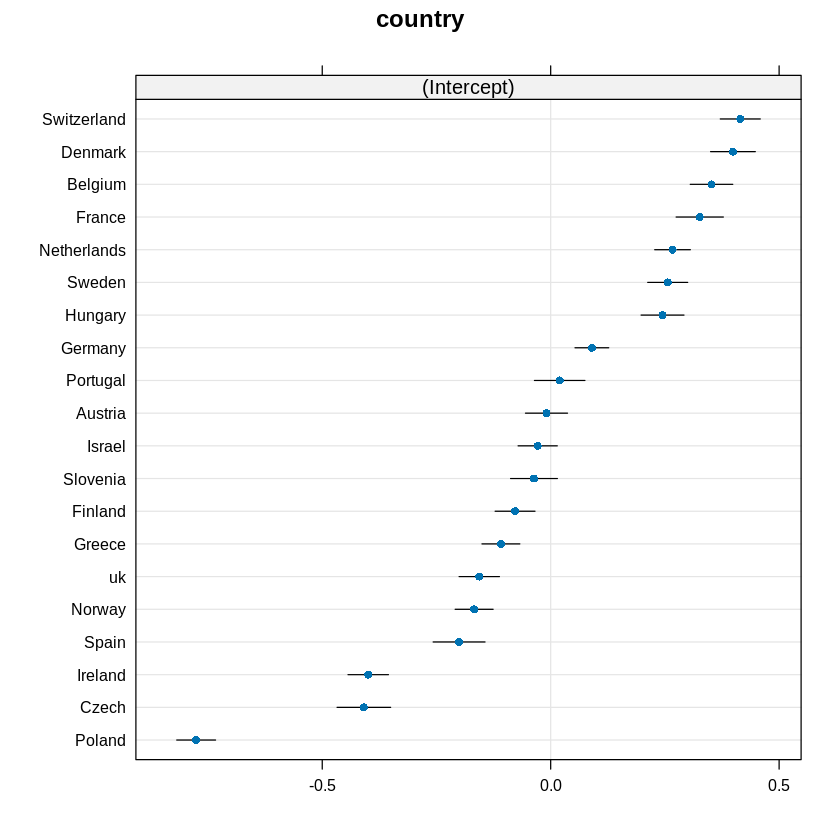

[1] "grpvar"  "term"    "grp"     "condval" "condsd"

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


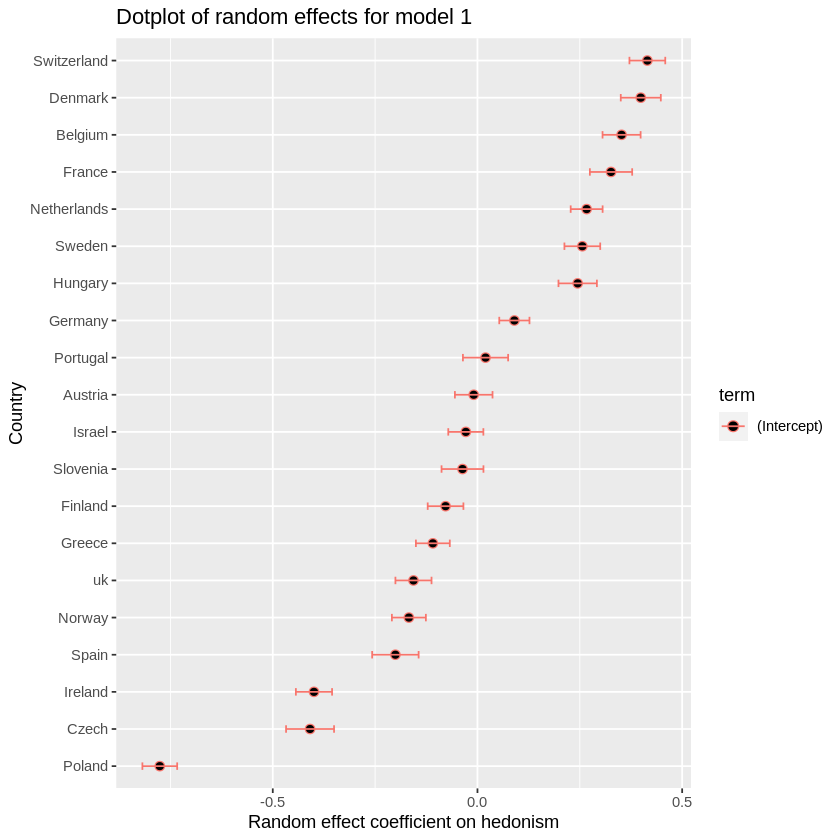

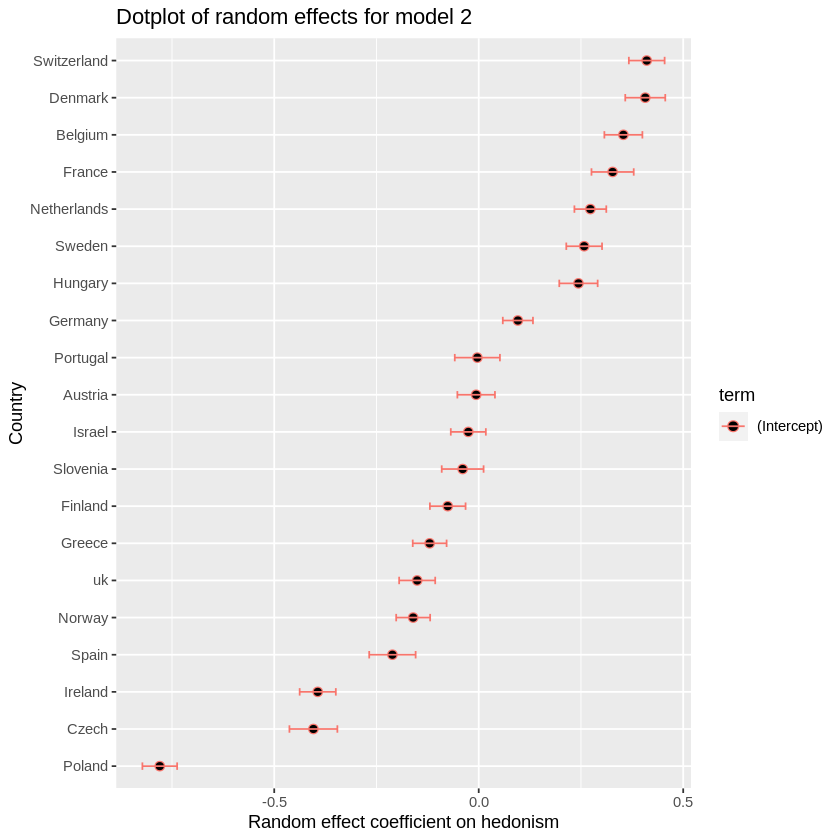

In [14]:
random_effects_mlm1 <- ranef(New_mlm1)
#We can use the dotplot to take a look at the random effects in a very simple way
dotplot(random_effects_mlm1)
#Though, this doesn't look very nice
#Why don't we try a nicer plotting system
#For this we need to load in the libary ggplot2 which is meant for creating nicer plots
library(ggplot2)

#First we convert our random effects to a data frame
data_re_mlm1 <- as.data.frame(random_effects_mlm1)
names(data_re_mlm1)
#Now, some of the names are a bit odd here but nicely for us, these names will be constant no matter what we do
#The names mean the following: grpvar is the variable being grouped, term is the name of the coefficient, grp is the group being identified, condval is the value taken by the random effect, and condre is the standard error
 ggplot(data_re_mlm1, aes(x=condval, y= grp , color = term)) + ggtitle('Dotplot of random effects for model 1') +xlab('Random effect coefficient on hedonism') +ylab('Country')+
   geom_dotplot(binaxis='y', stackdir='center',
                stackratio=1.5, dotsize=0.4) + 
   geom_errorbar(aes(xmin = condval- (1.96 * condsd),
                     xmax = condval+ (1.96 * condsd)), width = 0.2, position = position_dodge(0.9))
#Since, this is all standardised, it is easy to just create a similar plot for model 2
random_effects_mlm2 <- ranef(New_mlm2)
data_re_mlm2 <- as.data.frame(random_effects_mlm2)
names(data_re_mlm2)

 ggplot(data_re_mlm2, aes(x=condval, y= grp , color = term)) + ggtitle('Dotplot of random effects for model 2') +xlab('Random effect coefficient on hedonism') +ylab('Country')+
   geom_dotplot(binaxis='y', stackdir='center',
                stackratio=1.5, dotsize=0.4) + 
   geom_errorbar(aes(xmin = condval- (1.96 * condsd),
                     xmax = condval+ (1.96 * condsd)), width = 0.2, position = position_dodge(0.9))

In [12]:
data_re_mlm1

grpvar,term,grp,condval,condsd
<chr>,<fct>,<fct>,<dbl>,<dbl>
country,(Intercept),Austria,-0.009162452,0.02344560
country,(Intercept),Belgium,0.352022341,0.02371940
country,(Intercept),Switzerland,0.414981393,0.02231762
country,(Intercept),Czech,-0.408919663,0.02990505
country,(Intercept),Germany,0.090144333,0.01881814
country,(Intercept),Denmark,0.398948978,0.02495837
country,(Intercept),Spain,-0.200489448,0.02895409
country,(Intercept),Finland,-0.077947651,0.02224762
country,(Intercept),France,0.326237219,0.02635616


OK, very good. Now, why don't we do something similar for random slopes models. Right, so let's do that with gender. We want to not get a singular fit. So, we drop eduyrs from the model for simplicity in this case. 

In [18]:
New_mlm3 <- lmer(hed ~ agecen + female + (1+ female|country), data=na.omit(hedon), REML = FALSE)
summary(New_mlm3)
random_effects_mlm3 <- ranef(New_mlm3)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: hed ~ agecen + female + (1 + female | country)
   Data: na.omit(hedon)

     AIC      BIC   logLik deviance df.resid 
 76568.6  76626.6 -38277.3  76554.6    29412 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.1711 -0.6501  0.0500  0.6868  4.8613 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 country  (Intercept) 0.06329  0.2516       
          female      0.01352  0.1163   0.79
 Residual             0.78679  0.8870       
Number of obs: 29419, groups:  country, 20

Fixed effects:
              Estimate Std. Error t value
(Intercept) -0.1487421  0.0567737   -2.62
agecen      -0.0172437  0.0002959  -58.28
female      -0.1130822  0.0280594   -4.03

Correlation of Fixed Effects:
       (Intr) agecen
agecen -0.002       
female  0.691 -0.008

So, again here we have a slope model. In terms of interpretting random effects, we can calculate the VPC in the normal way. So, the total VPC at country is $\frac{0.0135 +0.0633}{0.0135 +0.0633 + 0.787} = 0.089. Now, let's look at the individual random effects.

$country


[1] "grpvar"  "term"    "grp"     "condval" "condsd"

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


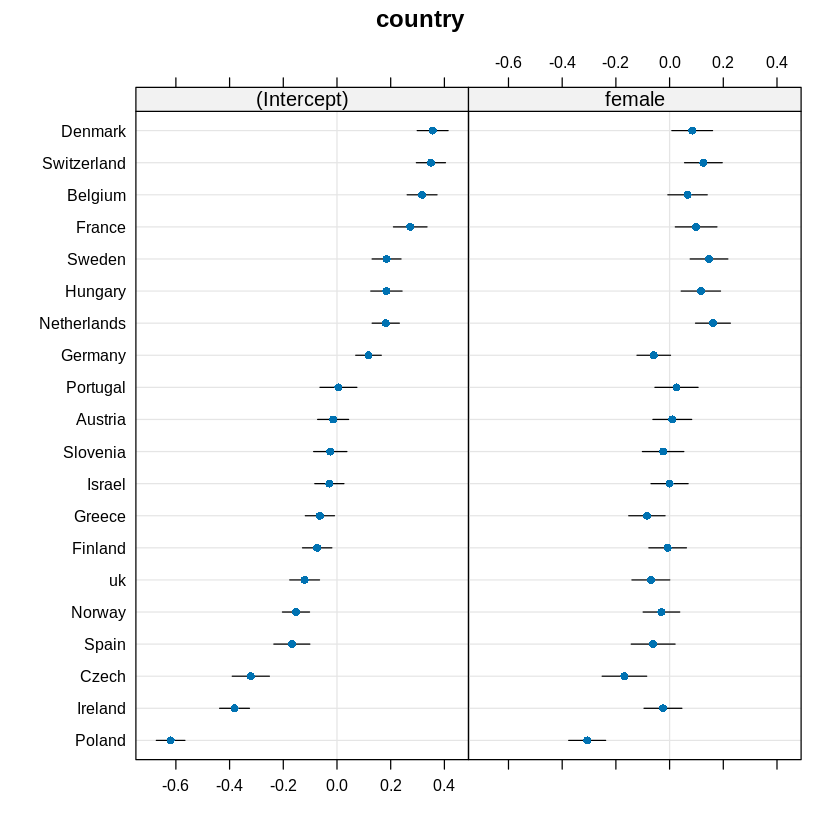

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


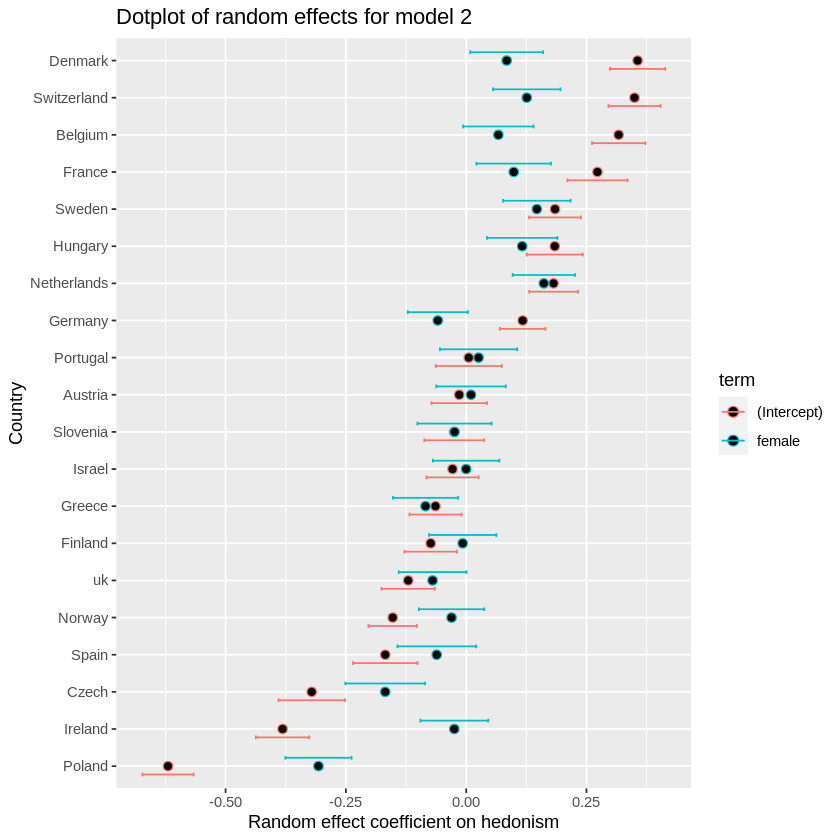

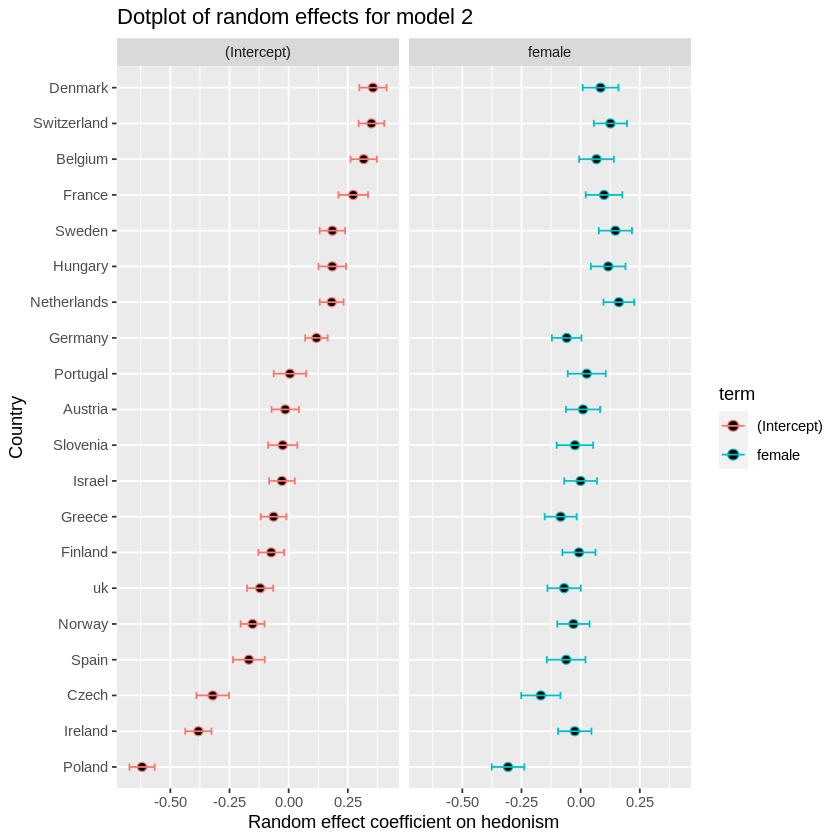

In [22]:
#We can use th dotplot function just like before first
dotplot(random_effects_mlm3)
#But again, this doesn't look great
#Let's try again with ggplot
random_effects_mlm3 <- ranef(New_mlm3)
data_re_mlm3 <- as.data.frame(random_effects_mlm3)
names(data_re_mlm3)

 ggplot(data_re_mlm3, aes(x=condval, y= grp , color = term)) + ggtitle('Dotplot of random effects for model 2') +xlab('Random effect coefficient on hedonism') +ylab('Country')+
   geom_dotplot(binaxis='y', stackdir='center',
                stackratio=1.5, dotsize=0.4) + 
   geom_errorbar(aes(xmin = condval- (1.96 * condsd),
                     xmax = condval+ (1.96 * condsd)), width = 0.2, position = position_dodge(0.9))
#So we initally get a a plot with the intercept and gender on the same plot. If we want to split them up, we can do the following
#But we can fix this really easily
 ggplot(data_re_mlm3, aes(x=condval, y= grp , color = term)) + ggtitle('Dotplot of random effects for model 2') +xlab('Random effect coefficient on hedonism') +ylab('Country')+
   geom_dotplot(binaxis='y', stackdir='center',
                stackratio=1.5, dotsize=0.4) + 
   geom_errorbar(aes(xmin = condval- (1.96 * condsd),
                     xmax = condval+ (1.96 * condsd)), width = 0.2, position = position_dodge(0.9)) + facet_grid(. ~ term)


Now, just to interpret this. It seems that hedonism tends to be lower in countries like Poland, Ireland and Spain. This seems to make sense since during the time that this data was collected, Spain and Ireland were going through significant economic troubles and Poland is generally a country which is relatively poor in the context of Europe. It may also have to do with the fact that thesea re Catholic heritage countries. In that context, I might look for some literature to suggest what the impact of catholic heritage is on hedonism. At the higher end, Denmark and Switzerland generaly ahve higher hedonism levels. These are generally wealthy countries with effective social services. These are also protestant heritage countries which may suggest that countries with a more protestant heritage might have higher hedonism level overall. Again, we would need to look for sources in the literature to substantiate this analysis.

The random effect of gender is harder to interpret as it is much smaller and mostly appears insigignificant. However, perhapscounrties like Poland and Czech may have higher levels of social conservatism which hampers hedonism amongts women in those countries. Their effect is negative while the effect countries like France, Sweden and the Netherland is postive for women. As there is a correlation of 0.89 between these 2 random effects, we can see that countries that tend to have higher hedonism also tend to have a greater positive effect for women in those countries.